# RAP - Roll Angle Predictor
The task is to build a regression model, which is able to predict the roll angle based on the given plane picture.

In [50]:
import keras
from keras import layers
from keras import models
import os, shutil
import IPython.display as display
from PIL import Image
import numpy as np
import csv
import pandas as pd

In [51]:
base_dir = 'C:/Users/mikozyra/Documents/Exercises/Exercise_3'

train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
csv_dir = os.path.join(base_dir, 'plane_data.csv')

with open('C:/Users/mikozyra/Documents/Exercises/Exercise_3/plane_data.csv') as csvfile:
    plane = csv.reader(csvfile)


In [137]:
data = pd.read_csv(csv_dir, error_bad_lines=False,sep=';',dtype={'angle': np.float64})

data

,folder,filename,angle
0,train,samolot00001.png,-45.000000
1,train,samolot00003.png,-44.774989
2,train,samolot00005.png,-44.549978
3,train,samolot00007.png,-44.324966
4,train,samolot00009.png,-44.099955
...,...,...,...
9995,train,samolot19991.png,43.987449
9996,train,samolot19993.png,44.212461
9997,train,samolot19995.png,44.437472
9998,train,samolot19997.png,44.662483


Model:

In [53]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1))

In [54]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [184]:
from keras import optimizers

model.compile(loss='mse',
              optimizer='rmsprop',
              #optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['mae'])

In [194]:
from keras.preprocessing import image

fnames_train = [os.path.join(train_dir, fname) for fname in os.listdir(train_dir)]

fnames_test =  [os.path.join(test_dir, fname) for fname in os.listdir(test_dir)]

# Wczytujemy obraz i zmieniamy jego rozdzielczość.
img_train = [image.load_img(img_path, target_size=(150, 150)) for img_path in fnames_train]

img_test = [image.load_img(img_path, target_size=(150, 150)) for img_path in fnames_test]


In [195]:
# Zamieniamy obraz w tablicę Numpy o kształcie (150, 150, 3).
x_train = [image.img_to_array(img_tmp) for img_tmp in img_train]

x_test = [image.img_to_array(img_tmp) for img_tmp in img_test]

In [196]:
#from array import array.fromlist 
x_train = np.array(x_train)
x_test = np.array(x_test)

In [86]:
print(x_train.shape)

(9600, 150, 150, 3)


Vector of labels:

In [197]:
y_train = data.angle[:9600]
y_train = np.array(y_train)

y_test = data.angle[9600:]
y_test = np.array(y_test)

from sklearn.model_selection import train_test_split

val_split = 0.2
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=val_split)

Visualization of training data:

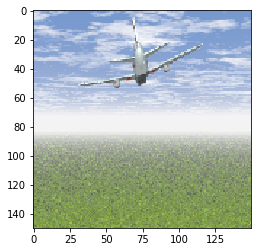

-13.62893145


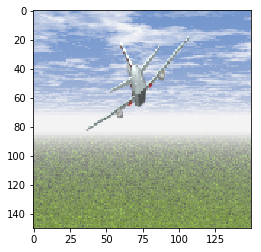

-34.3479674


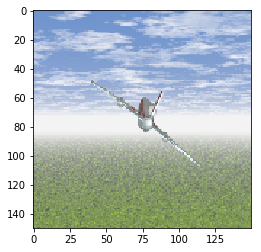

30.64878244


In [198]:
import matplotlib.pyplot as plt

plt.figure(1)
imgplot = plt.imshow(image.array_to_img(x_train[5]))
plt.show()
print(y_train[5])

plt.figure(2)
imgplot = plt.imshow(image.array_to_img(x_train[3]))
plt.show()
print(y_train[3])

plt.figure(3)
imgplot = plt.imshow(image.array_to_img(x_train[10]))
plt.show()
print(y_train[10])

In [160]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(150, 150, 3)
(7680,)
(1920, 150, 150, 3)
(1920,)


In [200]:
#datagen = ImageDataGenerator(rescale=1/255.,validation_split=0.2)
datagen = ImageDataGenerator(rescale=1/255.)

training_generator = datagen.flow(x_train, y_train, batch_size=48)
validation_generator = datagen.flow(x_val, y_val, batch_size=48)

test_generator = datagen.flow(x_test,y_test,batch_size=20)
#training_generator = datagen.flow(x_train, y_train, batch_size=96)


In [179]:
7680/48

160.0

In [144]:
for data_batch, labels_batch in training_generator:
    print('Shape of inputs:', data_batch.shape)
    print('Shape of labels:', data_batch.shape)
    print('i.e. value of label:', labels_batch[1])
    break

kształt danych wsadowych: (96, 150, 150, 3)
-22.18835942


In [180]:
1920/48

40.0

In [187]:
history = model.fit_generator(
      training_generator,
      steps_per_epoch=7680/48,#160
      epochs=50,
      validation_data=validation_generator,
      validation_steps=1920/48 #40
)

Epoch 1/50
160/160 [==============================] - 346s 2s/step - loss: 150.5414 - mean_absolute_error: 7.7641 - val_loss: 77.8640 - val_mean_absolute_error: 7.3914
Epoch 2/50
160/160 [==============================] - 349s 2s/step - loss: 33.5361 - mean_absolute_error: 4.1989 - val_loss: 6.7502 - val_mean_absolute_error: 2.0409
Epoch 3/50
160/160 [==============================] - 350s 2s/step - loss: 23.5725 - mean_absolute_error: 3.3522 - val_loss: 8.4560 - val_mean_absolute_error: 2.3180
Epoch 4/50
160/160 [==============================] - 341s 2s/step - loss: 21.1004 - mean_absolute_error: 3.1781 - val_loss: 3.6787 - val_mean_absolute_error: 1.5086
Epoch 5/50
160/160 [==============================] - 336s 2s/step - loss: 12.4311 - mean_absolute_error: 2.5935 - val_loss: 11.3474 - val_mean_absolute_error: 2.7296
Epoch 6/50
160/160 [==============================] - 334s 2s/step - loss: 12.3304 - mean_absolute_error: 2.5772 - val_loss: 17.1870 - val_mean_absolute_error: 3.4557


160/160 [==============================] - 492s 3s/step - loss: 1.0315 - mean_absolute_error: 0.7889 - val_loss: 0.5464 - val_mean_absolute_error: 0.5709


In [188]:
#model.save('plane1_20.h5')#20 epoch
model.save('plane_mae_50.5')

In [191]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_mean_absolute_error', 'loss', 'mean_absolute_error'])

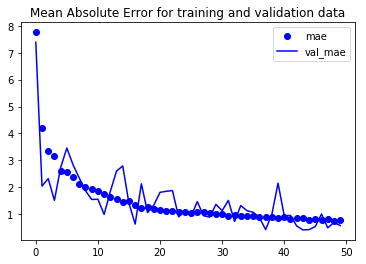

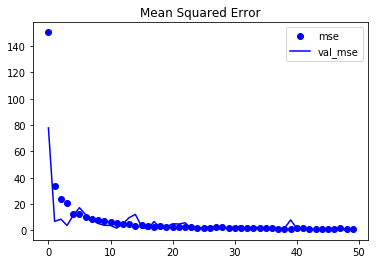

In [199]:
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(mae))

plt.plot(epochs, mae, 'bo', label='mae')
plt.plot(epochs, val_mae, 'b', label='val_mae')
plt.title('Mean Absolute Error for training and validation data')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='mse')
plt.plot(epochs, val_loss, 'b', label='val_mse')
plt.title('Mean Squared Error')
plt.legend()

plt.show()

In [205]:
test_loss, test_mae = model.evaluate_generator(test_generator, steps = 20)
print('MSE of testing data:', test_loss)
print('MAE of testing data:', test_mae)

MSE of testing data: 1.9205789774656297
MAE of testing data: 1.0935391932725906


1.0935391932725906